# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Anjana Dhakal, 11/20/2024
GitHub repo link: https://github.com/anjana-codes/webmin_07_project

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Question 1. 
Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [108]:
import requests

# URL of the article
url = 'https://gardenbetty.com/the-no-dig-vegetable-garden/'

# Send a GET request to fetch the article
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the HTML content to a file
    with open('article.html', 'w', encoding='utf-8') as html_file:
        html_file.write(response.text)  # Use response.text to get the HTML content

    print('HTML content saved to \'article.html\'.')
else:
    print(f'Failed to retrieve the article. Status code: {response.status_code}')



HTML content saved to 'article.html'.


### Question 2. 
Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [109]:
from bs4 import BeautifulSoup
from textblob import TextBlob

# Open the saved HTML file and read its content
with open('article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the main article text (this depends on the HTML structure)
article_text = soup.get_text()


# Perform sentiment analysis using TextBlob
blob = TextBlob(article_text)
polarity = blob.sentiment.polarity

# Count the number of sentences in the article
sentence_count = len(article_text.split('.'))  # Simple way to count sentences

# Print the results
print(f"Polarity score of the article: {polarity:.2f}")
print(f"Number of sentences in the article: {sentence_count}")


Polarity score of the article: 0.13
Number of sentences in the article: 194


### Question 3. 
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [110]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

# Open the saved HTML file and read its content
with open('article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the main article text
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Create a list of tokens (lowercased) that are not punctuation, stop words, or empty strings
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and token.text.strip()]

# Use Counter to find the 5 most common tokens
token_frequencies = Counter(tokens)
most_common_tokens = token_frequencies.most_common(5)

# Print the results
print("Most common tokens:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")


Most common tokens:
Token: 'dig', Frequency: 82
Token: 'soil', Frequency: 62
Token: 'garden', Frequency: 60
Token: 'bed', Frequency: 38
Token: 'gardening', Frequency: 23


### Question 4. 
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [111]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

# Open the saved HTML file and read its content
with open('article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the main article text
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Create a list of lemmas (lowercased) that are not punctuation, stop words, or empty strings
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and token.text.strip()]

# Use Counter to find the 5 most common lemmas
lemma_frequencies = Counter(lemmas)
most_common_lemmas = lemma_frequencies.most_common(5)

# Print the results
print("Most common lemmas:")
for lemma, freq in most_common_lemmas:
      print(f"Lemma: '{lemma}', Frequency: {freq}")


Most common lemmas:
Lemma: 'dig', Frequency: 87
Lemma: 'garden', Frequency: 80
Lemma: 'soil', Frequency: 62
Lemma: 'bed', Frequency: 45
Lemma: 'plant', Frequency: 44


### Question 5. 
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

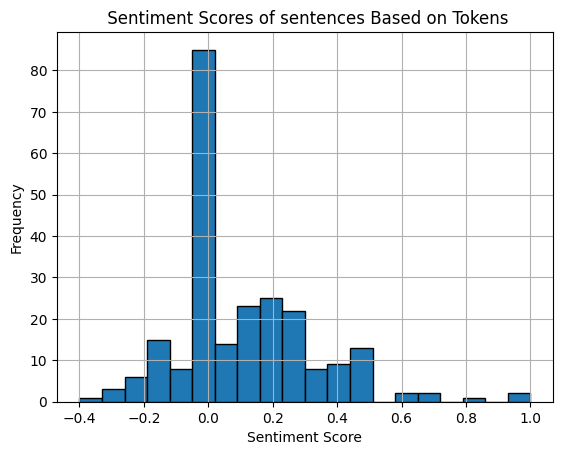

In [112]:
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

# Open the saved HTML file and read its content
with open('article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the main article text
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Split the article into sentences
sentences = list(doc.sents)

# Calculate sentiment scores for each sentence using TextBlob
sentence_scores = [TextBlob(sentence.text).sentiment.polarity for sentence in sentences]

# Plot the histogram of sentence scores
plt.hist(sentence_scores, bins=20, edgecolor='black')
plt.title(' Sentiment Scores of sentences Based on Tokens')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Comment: After observing the histogram, the most common range of sentiment scores is typically centered around 0. 



### Question 6. 
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

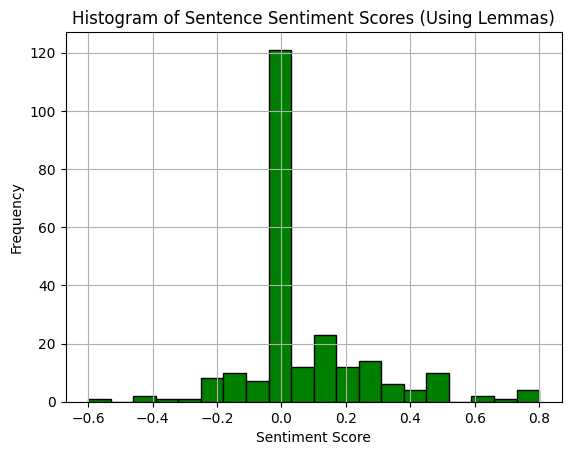

In [113]:
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

# Open the saved HTML file and read its content
with open('article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the main article text
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Split the article into sentences
sentences = list(doc.sents)

# Create a list to store sentiment scores for each sentence based on lemmas
sentence_scores_lemmas = []

# Calculate sentiment score for each sentence using lemmas
for sentence in sentences:
    sentence_text = " ".join([token.lemma_ for token in sentence if not token.is_punct and not token.is_stop])
    blob = TextBlob(sentence_text)
    polarity = blob.sentiment.polarity  # Sentiment score (-1 to 1)
    sentence_scores_lemmas.append(polarity)

# Plot the histogram of sentence scores based on lemmas
plt.hist(sentence_scores_lemmas, bins=20, color= 'green', edgecolor='black')
plt.title('Histogram of Sentence Sentiment Scores (Using Lemmas)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Comment: After observing the histogram, the most common range of sentiment scores appears to be around 0, 
# indicating neutral sentiment. Positive and negative sentiment scores are less frequent but still noticeable.


### Question 7. 
Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [114]:
import numpy as np

# Calculate median sentiment scores for tokens
cutoff_tokens = np.median(sentence_scores) #contains the scores based on tokens (from Question 5)

# Calculate median sentiment scores for lemmas
cutoff_lemmas = np.median(sentence_scores_lemmas) #contains the scores based on tokens (from Question 6)

# Print the cutoff scores
print(f"Cutoff Score (tokens): {cutoff_tokens}")
print(f"Cutoff Score (lemmas): {cutoff_lemmas}")

Cutoff Score (tokens): 0.028888888888888888
Cutoff Score (lemmas): 0.0


### Answer:


* Cutoff Score (tokens): 0.03
* Cutoff Score (lemmas): 0.0


### Question 8. 
Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [115]:
import spacy
from textblob import TextBlob
from bs4 import BeautifulSoup
import requests

# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

# Function to fetch article text from URL
def get_article_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Modify the class to match the new one ('entry-content')
    article = soup.find('div', {'class': 'entry-content'})  # Adjusted class
    return article.get_text() if article else ""

# Fetch article from the URL
url = 'https://gardenbetty.com/the-no-dig-vegetable-garden/'
article_text = get_article_text(url)

# Process the article text with spaCy
doc = nlp(article_text)

# Calculate sentiment scores for each sentence using TextBlob
sentence_scores = []
for sent in doc.sents:
    sentence_text = sent.text
    blob = TextBlob(sentence_text)
    polarity = blob.sentiment.polarity  # Sentiment score (-1 to 1)
    sentence_scores.append((sent, polarity))

# Set the cutoff score for tokens (based on prior analysis)
cutoff_score_tokens = 0.03  # Adjust this cutoff score

# Create a list to store sentences with scores above the cutoff
selected_sentences = [sent.text.strip() for sent, score in sentence_scores if score > cutoff_score_tokens]

# Generate the summary by joining the selected sentences
summary = ' '.join(selected_sentences)

# Print the summary
print("Summary of the article (Token-Based):")
print(summary)

# Print the number of sentences in summary
print("\nNumber of Sentences in the Summary:", len(selected_sentences))


Summary of the article (Token-Based):
Jump to How-To
I’ve started many new garden beds over the years, and you know what? Back in my old garden in California, it actually wouldâve been pretty challenging to dig anything, as I started one of my new beds in an old bathtub. They had it propped up under the feijoa tree on a stack of stones, and for many summers it was our repurposed party cooler, filled with ice and stuffed with cold beverages. I envisioned turning it into a planter (especially a future planter for potatoes and sweet potatoes, where the tubers could be contained), but the massive size made filling it with good-quality soil a little cost-prohibitive, considering we needed to top off all our existing garden beds as well. So I started looking into no-dig methods for building raised bedsâwhich pile on layers of organic materials that decompose over a season to create humus-rich earthâand settled on a method that’s changed the way I create new beds and make my own soil fo

### Question 9. 
Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [116]:
from textblob import TextBlob

# Generate the summary (replace this with your actual summary)
summary = ' '.join(selected_sentences)

# Calculate polarity of the summary using TextBlob
summary_blob = TextBlob(summary)
summary_polarity = summary_blob.sentiment.polarity

# Print the polarity score
print(f"Polarity score of the summary (Token-Based): {summary_polarity}")

# Print the number of sentences in the summarized article
num_sentences_in_summary = len(selected_sentences)
print(f"Number of sentences in the summarized article: {num_sentences_in_summary}")


Polarity score of the summary (Token-Based): 0.1953568823152156
Number of sentences in the summarized article: 64


### Question 10. 
Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [117]:
import requests
from bs4 import BeautifulSoup
import spacy
from textblob import TextBlob

# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

# Fetch article HTML (Replace URL with your target article)
url = 'https://gardenbetty.com/the-no-dig-vegetable-garden/'  # Replace with the URL you're working with
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract article text based on the div class used in the page
article = soup.find('div', {'class': 'entry-content'})  # Replace 'entry-content' with the appropriate class for your case
article_text = article.get_text() if article else ""

# Process the article text with spaCy
doc = nlp(article_text)

# Define a cutoff score based on previous analysis (this can be adjusted)
cutoff_score_lemmas = 0.0  # Example cutoff; modify as per your analysis in Question 7

# Create a list to store the sentences that pass the cutoff score
selected_sentences_lemmas = []

# Loop through the sentences and calculate the sentiment based on lemmas
for sent in doc.sents:
    sentence_text = sent.text
    # Lemmatize the sentence and analyze sentiment
    blob = TextBlob(sentence_text)
    sentiment_score_lemma = blob.sentiment.polarity  # Sentiment score based on lemmas
    # Select sentences with a sentiment score above the cutoff
    if sentiment_score_lemma > cutoff_score_lemmas:
        selected_sentences_lemmas.append(sentence_text.strip())

# Join the selected sentences into a clean summary
summary_lemmas = ' '.join(selected_sentences_lemmas)

# Print the summary
print("Summary of the Article (Lemma-Based):")
print(summary_lemmas)
print("\nNumber of Sentences in the Lemma-Based Summary:", len(selected_sentences_lemmas))


Summary of the Article (Lemma-Based):
Jump to How-To
I’ve started many new garden beds over the years, and you know what? Back in my old garden in California, it actually wouldâve been pretty challenging to dig anything, as I started one of my new beds in an old bathtub. They had it propped up under the feijoa tree on a stack of stones, and for many summers it was our repurposed party cooler, filled with ice and stuffed with cold beverages. I envisioned turning it into a planter (especially a future planter for potatoes and sweet potatoes, where the tubers could be contained), but the massive size made filling it with good-quality soil a little cost-prohibitive, considering we needed to top off all our existing garden beds as well. So I started looking into no-dig methods for building raised bedsâwhich pile on layers of organic materials that decompose over a season to create humus-rich earthâand settled on a method that’s changed the way I create new beds and make my own soil fo

### Question 11. 
Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [118]:
import requests
from bs4 import BeautifulSoup
import spacy
from textblob import TextBlob

# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

# Fetch article HTML (Replace URL with your target article)
url = 'https://gardenbetty.com/the-no-dig-vegetable-garden/'  # Replace with the URL you're working with
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract article text based on the div class used in the page
article = soup.find('div', {'class': 'entry-content'})  # Replace 'entry-content' with the appropriate class for your case
article_text = article.get_text() if article else ""

# Process the article text with spaCy
doc = nlp(article_text)

# Define a cutoff score based on previous analysis (this can be adjusted)
cutoff_score_lemmas = 0.0  # Example cutoff; modify as per your analysis in Question 7

# Create a list to store the sentences that pass the cutoff score
selected_sentences_lemmas = []

# Loop through the sentences and calculate the sentiment based on lemmas
for sent in doc.sents:
    sentence_text = sent.text
    # Lemmatize the sentence and analyze sentiment
    blob = TextBlob(sentence_text)
    sentiment_score_lemma = blob.sentiment.polarity  # Sentiment score based on lemmas
    # Select sentences with a sentiment score above the cutoff
    if sentiment_score_lemma > cutoff_score_lemmas:
        selected_sentences_lemmas.append(sentence_text.strip())

# Join the selected sentences into a clean summary
summary_lemmas = ' '.join(selected_sentences_lemmas)


# Print the polarity score of the summary
summary_blob = TextBlob(summary_lemmas)
summary_polarity = summary_blob.sentiment.polarity
print(f"\nPolarity score of the summary (based on lemmas): {summary_polarity}")

# Print the number of sentences in the summarized article
num_sentences_in_summary = len(selected_sentences_lemmas)
print(f"Number of sentences in the summarized article: {num_sentences_in_summary}")



Polarity score of the summary (based on lemmas): 0.1806578356450805
Number of sentences in the summarized article: 68


### Question 12.  
Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

### Answer:
The polarity score of the summary I generated based on tokens is 0.19, which is higher than the full article's polarity score of 0.13. This suggests that the sentences selected for the summary may have slightly more positive sentiment compared to the entire article. The number of sentences in the summary is 64, much fewer than the 194 sentences in the full article.

The polarity score of the summary I generated based on lemmas is 0.1806, which is higher than the full article's polarity score of 0.13. This suggests that the sentences selected for the summary may have slightly more positive sentiment compared to the entire article. The number of sentences in the summary is 68, much fewer than the 194 sentences in the full article.

The slight increase in polarity score could be due to the selection of sentences that contained more positive or optimistic sentiments, which is common when using sentiment-based filtering for summaries. Sentiment in the full article may have been more neutral overall, with the summary focusing on a subset of sentences that had a more positive tone.

### Question 13. 
Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

### Answer:
The better summary depends on the goal. Here,
Token-based summary highlights sentences with more positive sentiment, making it engaging but potentially missing nuances.
Lemmatization-based summary is simpler and more neutral, focusing on core ideas while excluding some variations.

I prefer token-based summaries because they focus on the actual words and their frequency, which helps in identifying the most relevant parts of the text. 